# Effect of context

Showing the effect of context on the generalized pair similarity measure (GPSM).

- the GPSM is calculated by taking a mean of the pair’s contextual similarity measure (frequency of the third, contextual character in a triplet) across one or more triplets, i.e. with different contextual characters.
- there are 8 characters in each session, i. e. each pair occurs in up to 6 triplets
- the following code calculates the GPSM for each pair studied based on groups of 1, 2, 3, 4, and 5 triplets (all possible combinations are covered) to show a relationship between the distribution of its standard deviation (STD) and the number of triplets used.
- in order to study the distribution of the variation, instead of the distribution of the measure/frequencies, one needs to use the STD
- note that there is no need to show the variant with 6 triplets as that produces a single group with the current data, i.e. there would be no deviation
- SEMs are also reported at the end of this notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from itertools import chain, combinations

# ---------------------------------------------------
# set global properties for plotting

font = {"family":"Adapter Mono PE", "size":"10", "weight":"medium"}
figure = {"titlesize":"10","titleweight":"medium"}
axes = {"titlesize":"10", "titleweight":"medium", "labelsize":"10", "labelweight":"medium"}
plt.rc("font", **font)
plt.rc("figure", **figure)
plt.rc("axes", **axes)
COL = "black"
box_colors = dict(boxes=COL, whiskers=COL, medians=COL, caps=COL)

In [3]:
d = pd.read_csv("csv/raw-data-preprocessed.csv", index_col=0, header=[0,1,2], dtype="unicode")
d.sort_index(axis=1, inplace=True)
f = pd.read_csv("csv/frequencies/frequencies_compact.csv", index_col=0, header=[0, 1, 2])
display(f)

all_scripts = ["cyrillic", "devanagari", "latin"]
all_typefaces = {script: sorted(set([t for t, _ in d[script].columns])) for script in all_scripts}
all_chars = list(set(d.values.ravel().tolist()))

cyrillic                                    \
                              arial                                     
  ('cyrl.ef', 'cyrl.em', 'cyrl.er') ('cyrl.ef', 'cyrl.em', 'cyrl.es')   
0                          0.101449                          0.275362   
1                          0.884058                          0.652174   
2                          0.014493                          0.072464   

                                                                           \
                                                                            
  ('cyrl.ef', 'cyrl.em', 'cyrl.short-i') ('cyrl.ef', 'cyrl.em', 'cyrl.u')   
0                               0.753623                         0.623188   
1                               0.043478                         0.289855   
2                               0.202899                         0.086957   

                                                                        \
                                                                         
  ('cyrl.ef', 'cyrl.em', 'cyrl.yu') ('cyrl.ef', 'cyrl.em', 'cyrl.zhe')   
0                          0.130435                           0.797101   
1                          0.826087                           0.072464   
2                          0.043478                           0.130435   

                                                                            \
                                                                             
  ('cyrl.ef', 'cyrl.er', 'cyrl.es') ('cyrl.ef', 'cyrl.er', 'cyrl.short-i')   
0                          0.289855                               0.072464   
1                          0.014493                               0.028986   
2                          0.695652                               0.898551   

                                                                      ...  \
                                                                      ...   
  ('cyrl.ef', 'cyrl.er', 'cyrl.u') ('cyrl.ef', 'cyrl.er', 'cyrl.yu')  ...   
0                         0.159420                          0.246377  ...   
1                         0.028986                          0.101449  ...   
2                         0.811594                          0.652174  ...   

                           latin                                 \
                         verdana                                  
  ('latn.o', 'latn.s', 'latn.u') ('latn.o', 'latn.s', 'latn.w')   
0                       0.174603                       0.158730   
1                       0.619048                       0.063492   
2                       0.206349                       0.777778   

                                                                 \
                                                                  
  ('latn.o', 'latn.s', 'latn.x') ('latn.o', 'latn.u', 'latn.w')   
0                       0.095238                       0.222222   
1                       0.047619                       0.015873   
2                       0.857143                       0.761905   

                                                                 \
                                                                  
  ('latn.o', 'latn.u', 'latn.x') ('latn.o', 'latn.w', 'latn.x')   
0                       0.063492                       0.730159   
1                       0.047619                       0.079365   
2                       0.888889                       0.190476   

                                                                 \
                                                                  
  ('latn.s', 'latn.u', 'latn.w') ('latn.s', 'latn.u', 'latn.x')   
0                       0.206349                       0.111111   
1                       0.079365                       0.063492   
2                       0.714286                       0.825397   

                                                                 
                                                                 
  ('

In [4]:
# Collect STDs for all GPSMs depending on how many triplets were used to calculate it.
# All combinations are covered, so there 6 x 1 triplets. 15 x 2 triplets, 20 x 3 triplets etc. (see report below)

GROUPINGS = list(range(1, 6))

# show how the combinations covered
for n in GROUPINGS:
  groups = set(combinations("abcdef", n))
  print(f"- {len(groups)} groups of {n} triplet(s): {groups}")

results = pd.DataFrame(index=[], columns=GROUPINGS, dtype=np.float32)
for script in all_scripts:
  for typeface in all_typefaces[script]:
    chars = list(chain(*[eval(t) for t in f[(script, typeface, )].columns]))
    pairs = set(combinations(chars, 2))
    count = 0
    for pair in pairs:
      # find triplets that include the pair
      a = []
      for triplet in f[(script, typeface, )].columns:
        triplet_ = eval(triplet)
        other = [c for c in triplet_ if c not in pair]
        if len(other) == 1:
          # get the frequency of the other character, i.e. the contextual similarity of the pair
          i = triplet_.index(other[0])
          a.append(f[(script, typeface, triplet)][i])

      # get STD for different groupings and aggregations of triplets
      if a != []:
        std = [np.std([np.mean(x) for x in set(combinations(a, n))]) for n in GROUPINGS]
        results.loc[str(pair)] = std
display(results)

- 6 groups of 1 triplet(s): {('b',), ('e',), ('d',), ('a',), ('f',), ('c',)}
- 15 groups of 2 triplet(s): {('b', 'f'), ('a', 'b'), ('c', 'd'), ('d', 'e'), ('a', 'e'), ('b', 'c'), ('c', 'e'), ('d', 'f'), ('a', 'f'), ('b', 'd'), ('a', 'c'), ('b', 'e'), ('c', 'f'), ('e', 'f'), ('a', 'd')}
- 20 groups of 3 triplet(s): {('b', 'e', 'f'), ('c', 'd', 'f'), ('a', 'b', 'c'), ('b', 'd', 'f'), ('a', 'd', 'f'), ('c', 'd', 'e'), ('b', 'c', 'd'), ('a', 'c', 'd'), ('b', 'c', 'f'), ('a', 'c', 'f'), ('d', 'e', 'f'), ('b', 'd', 'e'), ('a', 'd', 'e'), ('a', 'b', 'd'), ('c', 'e', 'f'), ('b', 'c', 'e'), ('a', 'c', 'e'), ('a', 'b', 'f'), ('a', 'e', 'f'), ('a', 'b', 'e')}
- 15 groups of 4 triplet(s): {('a', 'b', 'd', 'f'), ('b', 'c', 'd', 'e'), ('a', 'c', 'd', 'e'), ('a', 'b', 'c', 'e'), ('a', 'b', 'c', 'd'), ('b', 'c', 'd', 'f'), ('a', 'c', 'd', 'f'), ('a', 'd', 'e', 'f'), ('b', 'c', 'e', 'f'), ('c', 'd', 'e', 'f'), ('a', 'b', 'c', 'f'), ('a', 'c', 'e', 'f'), ('a', 'b', 'd', 'e'), ('a', 'b', 'e', 'f'), ('b',

,1,2,3,4,5
"('cyrl.er', 'cyrl.ef')",0.092421,0.058452,0.041332,0.029226,0.018484
"('cyrl.er', 'cyrl.em')",0.076001,0.044945,0.030286,0.021086,0.014033
"('cyrl.er', 'cyrl.short-i')",0.065201,0.037475,0.026175,0.018973,0.012000
"('cyrl.es', 'cyrl.ef')",0.277315,0.175390,0.124019,0.087695,0.055463
"('cyrl.es', 'cyrl.em')",0.060144,0.038039,0.026897,0.019019,0.012029
...,...,...,...,...,...
"('latn.u', 'latn.h')",0.109589,0.069310,0.049010,0.034655,0.021918
"('latn.o', 'latn.g')",0.279774,0.176944,0.125119,0.088472,0.055955
"('latn.s', 'latn.o')",0.254533,0.160981,0.113830,0.080490,0.050907
"('latn.s', 'latn.d')",0.324276,0.204419,0.139185,0.096372,0.061875


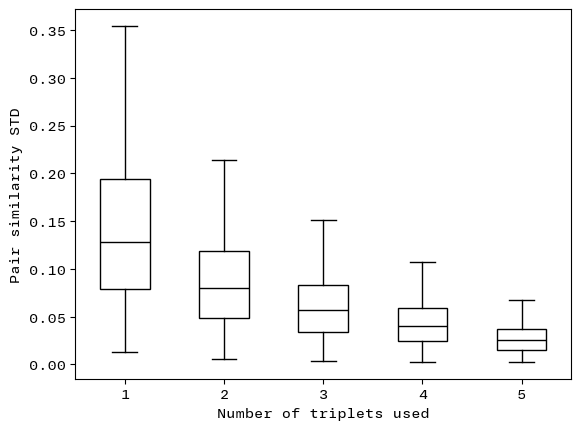

In [5]:
# Plot the STDs of all GPSMs against the size of the context (number of triplets used)

boxplot = results.plot(kind="box",
                       patch_artist=True,
                       showfliers=False,
                       boxprops=dict(facecolor="white", color=COL),
                       color=box_colors,
                       xlabel='Number of triplets used',
                       ylabel='Pair similarity STD',
                       ).get_figure()
boxplot.savefig("graphics/effect-of-context_box-plots.pdf", bbox_inches="tight")

In [10]:
# Standard deviations
# for different context sizes
results.std().round(4)

1    0.0780
2    0.0493
3    0.0349
4    0.0246
5    0.0154
dtype: float64

In [9]:
# Standard errors of the mean
# for different context sizes

results.sem().round(4)

1    0.0022
2    0.0014
3    0.0010
4    0.0007
5    0.0004
dtype: float64